<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_10_CNN_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Methods of classification and dimensionality reduction**


Paweł Lorek  
University of Wrocław

# LIST NR 10: CNN -- Convolutional Neural Networks



 <font face="Rage" size=2  > Updated: 23.05.2025 <font>


**NOTE: THIS SCRIPT IS NOT POLISHED**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
!pip install tqdm
from tqdm import tqdm

In [3]:
!pip install torchinfo
from torchinfo import summary as torch_summary

In [4]:
from keras import datasets # only to load 28x28 MNIST

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
# Convert data to float32 and add channel dimension
x_train_torch = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # shape: (N, 1, 28, 28)
x_test_torch = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)

# Convert labels to long tensors
y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Divide by 255 to scale pixel values from [0,255] to [0,1]
x_train_torch /= 255.0
x_test_torch /= 255.0

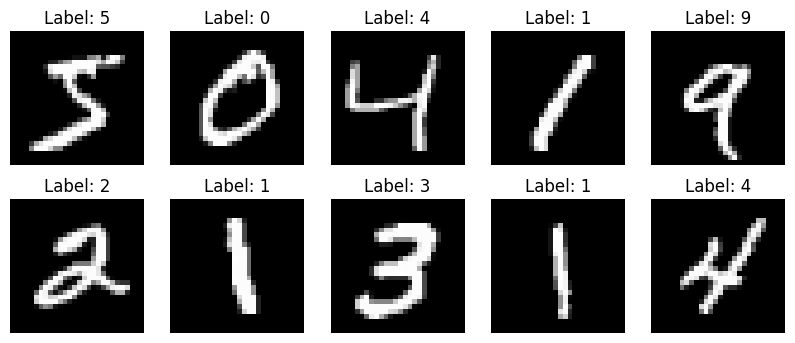

In [8]:
plt.figure(figsize=(10, 4))  #
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [9]:
x_train_main = x_train_torch[:50000]
y_train_main = y_train_torch[:50000]

x_val = x_train_torch[50000:]
y_val = y_train_torch[50000:]

# **Remark: Progress bars with `tqdm`**

The `tqdm` library is a simple and powerful tool for adding progress bars to your Python loops.
It is especially useful in machine learning to visualize the progress of training or data processing, and helps you quickly estimate how much time remains for a task.

Example usage:
```python
from tqdm import tqdm

for i in tqdm(range(100)):
    # Your code here
    pass
```

In [10]:
for i in tqdm(range(100)):
    # Your code here
    pass

100%|██████████| 100/100 [00:00<00:00, 923855.51it/s]


###  TensorDataset and DataLoaders (for batch training)

In [11]:
# Training set (first 50,000 samples)
train_dataset = TensorDataset(x_train_main, y_train_main)


batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



## Simple MLP:

In [12]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
num_classes = 10

model_mlp = nn.Sequential(
    nn.Flatten(),                  # (batch, 1, 28, 28) -> (batch, 28*28)
    nn.Linear(28*28, 256),
    nn.ReLU(),
    # nn.Dropout(0.2),             # Uncomment to use dropout after first hidden layer
    nn.Linear(256, 256),
    nn.ReLU(),
    #nn.Dropout(0.2),             # Uncomment to use dropout after second hidden layer
    nn.Linear(256, num_classes)
).to(device)

In [14]:
torch_summary(model_mlp)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Flatten: 1-1                           --
├─Linear: 1-2                            200,960
├─ReLU: 1-3                              --
├─Linear: 1-4                            65,792
├─ReLU: 1-5                              --
├─Linear: 1-6                            2,570
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.001)

In [16]:
# Training loop

n_epochs = 20

start_time = datetime.now()

for epoch in range(n_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model_mlp.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model_mlp(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x_batch.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(y_batch).sum().item()
        total += y_batch.size(0)

    train_loss = running_loss / total
    train_acc = correct / total
    print("Epoch: ",epoch+1, "/", n_epochs, ", \t loss = \t",train_loss)
time_elapsed = datetime.now() - start_time
print('TRAINING TIME (hh:mm:ss.ms) {}'.format(time_elapsed))

Epoch:  1 / 20 , 	 loss = 	 0.29008130910873414
Epoch:  2 / 20 , 	 loss = 	 0.10920051732897758
Epoch:  3 / 20 , 	 loss = 	 0.07331924453377724
Epoch:  4 / 20 , 	 loss = 	 0.053311147002279756
Epoch:  5 / 20 , 	 loss = 	 0.03952064248666167
Epoch:  6 / 20 , 	 loss = 	 0.02950546621380374
Epoch:  7 / 20 , 	 loss = 	 0.025277097506187857
Epoch:  8 / 20 , 	 loss = 	 0.02209237180579454
Epoch:  9 / 20 , 	 loss = 	 0.019965752528044396
Epoch:  10 / 20 , 	 loss = 	 0.014009967137894128
Epoch:  11 / 20 , 	 loss = 	 0.014023789367522113
Epoch:  12 / 20 , 	 loss = 	 0.012085441224856767
Epoch:  13 / 20 , 	 loss = 	 0.016555786262417677
Epoch:  14 / 20 , 	 loss = 	 0.010600947609960568
Epoch:  15 / 20 , 	 loss = 	 0.010778043860166217
Epoch:  16 / 20 , 	 loss = 	 0.010427558618187031
Epoch:  17 / 20 , 	 loss = 	 0.009994212741167576
Epoch:  18 / 20 , 	 loss = 	 0.008047028155626613
Epoch:  19 / 20 , 	 loss = 	 0.008218005578375888
Epoch:  20 / 20 , 	 loss = 	 0.010917205344221293
TRAINING TIME (

In [17]:
# Test set, loader:
test_dataset = TensorDataset(x_test_torch, y_test_torch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
# After training is finished
model_mlp.eval()  # Set the model to evaluation mode (turns off dropout/batchnorm)

test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Disable gradient calculation (saves memory, faster)
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model_mlp(x_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Calculate loss
        test_loss += loss.item() * x_batch.size(0)  # Sum total loss
        _, predicted = outputs.max(1)  # Get predicted class
        test_correct += predicted.eq(y_batch).sum().item()  # Count correct predictions
        test_total += y_batch.size(0)  # Count total samples

test_loss /= test_total  # Average loss per sample
test_acc = test_correct / test_total  # Accuracy

print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Test Loss: 0.1275 | Test Accuracy: 0.9793


# Convolutional Neural Network (CNN)

![Conv2D](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ulfFYH5HbWpLTIfuebj5mQ.gif)

## Convolutional Layer: `nn.Conv2d`

The **2D convolution layer (Conv2D)** is the fundamental building block of a CNN. It applies a set of learnable filters (kernels) to the input image, sliding over the image spatially to produce feature maps.

**Mathematically:**

Given an input image $x$ of size $h \times w$ and a filter $f$ of size $k_h \times k_w$:

$$
y_{i, j} = \sum_{m=0}^{k_h-1} \sum_{n=0}^{k_w-1} x_{i \cdot s_h + m - p_h,\, j \cdot s_w + n - p_w} \cdot f_{m, n}
$$

where:
- $s_h, s_w$ are the vertical and horizontal **strides**,
- $p_h, p_w$ are the vertical and horizontal **padding** amounts.

**Key parameters:**
- **Kernel size**: The size of the filter, e.g. $3 \times 3$ or $5 \times 5$.
- **Stride** ($s$): How many pixels the filter moves at each step.
    - Default: $s=1$ (moves 1 pixel at a time).
    - Larger stride ($s>1$) downsamples the output.
- **Padding** ($p$): The number of zeros added to the border of the input.
    - **No padding** ($p=0$): Output shrinks after convolution.
    - **Same padding** (often $p = \frac{k-1}{2}$): Output size is preserved.

**Output size formula:**

For input size $(h_\text{in}, w_\text{in})$, kernel size $(k_h, k_w)$, stride $(s_h, s_w)$, and padding $(p_h, p_w)$:
$$
h_\text{out} = \left\lfloor \frac{h_\text{in} + 2p_h - k_h}{s_h} \right\rfloor + 1
$$
$$
w_\text{out} = \left\lfloor \frac{w_\text{in} + 2p_w - k_w}{s_w} \right\rfloor + 1
$$

**PyTorch command:**




```python
nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

- `in_channels`: Number of input channels (e.g., 1 for grayscale, 3 for RGB).
- `out_channels`: Number of output feature maps (filters).
- `kernel_size`: Tuple or int, e.g., 3 or (3, 3).
- `stride`: Tuple or int, e.g., 1 or (2, 2).
- `padding`: Tuple or int, e.g., 0 or (1, 1).

**Examples:**
```python
nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0) # classic LeNet
nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1) # stride and padding
```


**Padding = 1**

![Padding](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/cnn_padding.png)

**Stride = 2**

![Stride](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/cnn_stride.png)





### Example of 5x5 "Image" (grayscale) and 3x3 Kernel.
Let's imagine a $5 \times 5$ grayscale input and a $3 \times 3$ filter.
The Conv2d operation (with no padding and stride=1) will slide the kernel over the input, as shown in the animation.

**Input Image Example:** (Just an example. The numbers are arbitrary.)

```
[ 0 0 0 0 0 ]
[ 0 1 2 3 0 ]
[ 0 4 5 6 0 ]
[ 0 7 8 9 0 ]
[ 0 0 0 0 0 ]
```

**Kernel Example:**

```
[ k11 k12 k13 ]
[ k21 k22 k23 ]
[ k31 k32 k33 ]
```

**Manual Calculation of Trainable Parameters**

For a Conv2d layer:

- **Each filter (kernel) has size** $k_h \times k_w$.
- **Each filter also has one bias parameter.**
- **If there are $C_\text{in}$ input channels and $C_\text{out}$ output channels (filters):**

$$
\text{Trainable parameters} = C_\text{out} \times (C_\text{in} \times k_h \times k_w + 1)
$$

For our specific case:
- $C_\text{in} = 1$ (grayscale input)
- $C_\text{out} = 1$ (one output channel / filter)
- $k_h = 3$, $k_w = 3$

So:

$$
\text{Trainable parameters} = 1 \times (1 \times 3 \times 3 + 1) = 1 \times (9 + 1) = 10
$$

**Therefore, there are 10 trainable parameters (9 weights + 1 bias) in this Conv2d layer.**


Sanity check: implement above example and display summary:

In [19]:
# Define the Conv2d layer: 1 input channel, 1 output channel, kernel 3x3
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)

# Input shape: (batch_size, channels, height, width)
input_shape = (1, 1, 5, 5)

# Print summary
torch_summary(conv, input_size=input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
Conv2d                                   [1, 1, 3, 3]              10
Total params: 10
Trainable params: 10
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# Average and Max Pooling

![Pooling](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/cnn_pooling.png)


## Average Pooling (`nn.AvgPool2d`)

**Average pooling** is an operation that reduces the spatial size of the feature maps by computing the average value within each non-overlapping window (patch) of the input.

Given a feature map $x$ and a pooling window of size $k \times k$ (stride $s$):

$$
y_{i, j} = \frac{1}{k^2} \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} x_{s \cdot i + m,\, s \cdot j + n}
$$

- **PyTorch command:**  
  `nn.AvgPool2d(kernel_size, stride)`

- **Example:**  
  `nn.AvgPool2d(kernel_size=2, stride=2)`

---

## Max Pooling (`nn.MaxPool2d`)

**Max pooling** is an operation that reduces the spatial size of the feature maps by taking the maximum value within each non-overlapping window (patch) of the input.

Given a feature map $x$ and a pooling window of size $k \times k$ (stride $s$):

$$
y_{i, j} = \max_{0 \leq m < k} \max_{0 \leq n < k} x_{s \cdot i + m,\, s \cdot j + n}
$$

- **PyTorch command:**  
  `nn.MaxPool2d(kernel_size, stride)`

- **Example:**  
  `nn.MaxPool2d(kernel_size=2, stride=2)`


## Dropout (`nn.Dropout`)

![Pooling](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/dropout.gif)


![Pooling](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/dropout1.png)


**Dropout** is a regularization technique used to reduce overfitting in neural networks. During training, dropout randomly sets a fraction $p$ of the input units to zero at each update, which helps prevent the network from relying too heavily on any particular neuron.

- At each training step, each neuron is kept with probability $1-p$ (where $p$ is the dropout rate).
- During evaluation (inference), dropout is not applied; all units are used, but their outputs are scaled appropriately.

**Mathematically:**

For a layer input $x$ and dropout rate $p$:

$$
\tilde{x}_i =
\begin{cases}
0 & \text{with probability } p \\
\frac{x_i}{1-p} & \text{with probability } 1-p
\end{cases}
$$

- This scaling ensures the expected value of the input remains the same during training and evaluation.

**PyTorch command:**  
`nn.Dropout(p)`

- `p`: probability of an element to be zeroed (dropout rate).

**Example:**  
`nn.Dropout(0.5)`  # 50% dropout rate

---

*Typical values of $p$ are 0.2–0.5. Dropout is usually applied after activation functions (e.g., ReLU) in fully connected or convolutional layers.*



# AlexNet


![AlexNet](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/LeNet5_MNIST28x28c.png)

## Let's break it down: Layer-by-layer correspondence: LeNet-5

1. **Input:**  
   $28 \times 28$ grayscale image (e.g., MNIST).

2. **First Conv2D:**  
   `nn.Conv2d(1, 6, 5)`  
   - **Input:** $28 \times 28$
   - **Output:** $6$ feature maps of $24 \times 24$  
     (since $28 - 5 + 1 = 24$)
   - **Activation:** `nn.Tanh()`

3. **First Average Pooling:**  
   `nn.AvgPool2d(2)`  
   - **Output:** $6$ feature maps of $12 \times 12$

4. **Second Conv2D:**  
   `nn.Conv2d(6, 16, 5)`  
   - **Output:** $16$ feature maps of $8 \times 8$  
     (since $12 - 5 + 1 = 8$)
   - **Activation:** `nn.Tanh()`

5. **Second Average Pooling:**  
   `nn.AvgPool2d(2)`  
   - **Output:** $16$ feature maps of $4 \times 4$

6. **Flatten:**  
   $16 \times 4 \times 4 = 256$ features

7. **Dense/Linear layers:**  
   - `nn.Linear(256, 120)`, `nn.Tanh()`
   - `nn.Linear(120, 84)`, `nn.Tanh()`
   - `nn.Linear(84, 10)` (outputs: logits for 10 classes)

---

- **No softmax at the end:** In PyTorch, use `nn.CrossEntropyLoss`, which includes softmax internally.
- **This structure matches the classic LeNet-5 architecture and your provided diagram.**


In [20]:

LeNet5_Model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),  # First convolution
    nn.Tanh(),                        # Activation
    nn.AvgPool2d(kernel_size=2),      # Subsampling (pooling)
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), # Second convolution
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Flatten(),                     # Flatten feature maps into a vector
    nn.Linear(16*4*4, 120),           # First fully connected layer
    nn.Tanh(),
    nn.Linear(120, 84),               # Second fully connected layer
    nn.Tanh(),
    nn.Linear(84, 10)                 # Output layer (10 classes, no Softmax)
)


In [ ]:
torch_summary(LeNet5_Model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            156
├─Tanh: 1-2                              --
├─AvgPool2d: 1-3                         --
├─Conv2d: 1-4                            2,416
├─Tanh: 1-5                              --
├─AvgPool2d: 1-6                         --
├─Flatten: 1-7                           --
├─Linear: 1-8                            30,840
├─Tanh: 1-9                              --
├─Linear: 1-10                           10,164
├─Tanh: 1-11                             --
├─Linear: 1-12                           850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0

**Notes**
* In PyTorch, *do not add* `nn.Softmax` *as the last layer* if you use `nn.CrossEntropyLoss`, because it applies `LogSoftmax` internally.

* For classic LeNet-5 with `28x28` images and no padding, the final feature map size before the `Linear` layer is $16 \times 4 \times 4$.

* If your image size is different, adjust the `nn.Linear` input features accordingly.

In [ ]:



n_epochs = 5


# Choose loss function (for classification with logits)
criterion = nn.CrossEntropyLoss()

# Choose optimizer and tell it to optimize all parameters in LeNet5_Model
# Adam optimizer:
optimizer_LeNet5 = optim.Adam(LeNet5_Model.parameters(), lr=0.001)


start_time = datetime.now()

for epoch in range(n_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    LeNet5_Model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer_LeNet5.zero_grad()
        outputs = LeNet5_Model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer_LeNet5.step()

        running_loss += loss.item() * x_batch.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(y_batch).sum().item()
        total += y_batch.size(0)

    train_loss = running_loss / total
    train_acc = correct / total
    print("Epoch: ", epoch+1, "/", n_epochs, ", \t loss = \t", train_loss)
time_elapsed = datetime.now() - start_time
print('TRAINING TIME (hh:mm:ss.ms) {}'.format(time_elapsed))

Epoch:  1 / 5 , 	 loss = 	 0.3429482515025139
Epoch:  2 / 5 , 	 loss = 	 0.10969357136249543
Epoch:  3 / 5 , 	 loss = 	 0.07523882004082202
Epoch:  4 / 5 , 	 loss = 	 0.05657168304763734
Epoch:  5 / 5 , 	 loss = 	 0.047069279798567294
TRAINING TIME (hh:mm:ss.ms) 0:01:02.739435


In [ ]:
# After training is finished
LeNet5_Model.eval()  # Set the model to evaluation mode (turns off dropout/batchnorm)

test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Disable gradient calculation (saves memory, faster)
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = LeNet5_Model(x_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Calculate loss
        test_loss += loss.item() * x_batch.size(0)  # Sum total loss
        _, predicted = outputs.max(1)  # Get predicted class
        test_correct += predicted.eq(y_batch).sum().item()  # Count correct predictions
        test_total += y_batch.size(0)  # Count total samples

test_loss /= test_total  # Average loss per sample
test_acc = test_correct / test_total  # Accuracy

print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Test Loss: 0.0507 | Test Accuracy: 0.9839


**^^ Better accuracy, shorter training time, fewer parameters (~44k vs ~270k for model_mlp) !!!**

#Q10.1 **CNN for CIFAR10 Dataset**

**Q10.1 STARTS**

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np


import torchvision
import torchvision.transforms as transforms

# CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

#load dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=None)


In [ ]:
# Convert trainset to NumPy arrays
x_train = np.stack([np.array(img) for img, _ in trainset])  # shape: (50000, 32, 32, 3)
y_train = np.array([label for _, label in trainset])        # shape: (50000,)

# Convert testset to NumPy arrays
x_test = np.stack([np.array(img) for img, _ in testset])    # shape: (10000, 32, 32, 3)
y_test = np.array([label for _, label in testset])          # shape: (10000,)



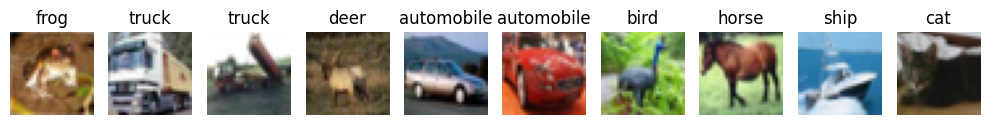

In [ ]:
# Display 6 images with class names (from trainset)
plt.figure(figsize=(10, 2))
for i in range(10):
    img_np = x_train[i] / 255.0  # Scale to [0, 1] for matplotlib
    plt.subplot(1, 10, i + 1)
    plt.imshow(img_np)
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Convert to torch tensors and move color channel to dimension 1
x_train_torch = torch.tensor(x_train, dtype=torch.float32).permute(0, 3, 1, 2) / 255.0  # (N, 3, 32, 32)
x_test_torch  = torch.tensor(x_test,  dtype=torch.float32).permute(0, 3, 1, 2) / 255.0

y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch  = torch.tensor(y_test,  dtype=torch.long)

In [ ]:
x_train[0].shape #32x32 image, 3 channels

(32, 32, 3)

In [ ]:
# Create DataLoaders
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_dataset = TensorDataset(x_train_torch, y_train_torch)
test_dataset = TensorDataset(x_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

**TASK**



Use the classic LeNet-5 convolutional neural network to classify images from the CIFAR-10 dataset.

### Instructions

1. **Modify LeNet-5:**  
   Adapt the classic LeNet-5 architecture to work with CIFAR-10 images (32x32 RGB):

   - Change the first convolutional layer so it accepts color images: set `in_channels=3`.
   - Update the first fully connected (linear) layer. Its input dimension must match the output size after all convolution and pooling layers:  
     Replace `nn.Linear(16*4*4, 120)` with `nn.Linear(16*r*r, 120)`, where you must compute `r` based on the CIFAR-10 image size (32x32).  
     **Hint:** `r` is the width/height of the feature map after both convolution and pooling operations.
   - Call your model `LeNet5_Model_color`.

2. **Train and Test:**  
   - Train your network using the provided `train_loader` (CIFAR-10 training set).
   - Evaluate your model on `test_loader` (CIFAR-10 test set) and print test accuracy and loss.

**Remarks**
   - `CIFAR-10` dataset is more challenging than MNIST, you can expect LeNet5 will yield accuracy 50%-60%
   - For best models for `CIFAR-10` see [https://paperswithcode.com/sota/image-classification-on-cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

**Hints:**  
- Use `nn.CrossEntropyLoss` as your loss function.  
- Use Adam or SGD optimizer.  
- Do not use softmax as the last layer.  
- Make sure input shape is `(batch, 3, 32, 32)` (should already be the case).




**Q10.1 ENDS**

In [ ]:
#Check i it is of shape (n,3,32,32)
x_train_torch.shape

torch.Size([50000, 3, 32, 32])

In [ ]:
device

device(type='cpu')

#Q10.2 A **better** CNN architecture for CIFAR10 Dataset

**Q10.2 STARTS**

As we have seen -- LeNet5 did not yield very good results for CIFAR-10.
In this assignment you will implement another architecture which *should* yield better results. Note that **training time will be significantly longer** (~10 min on CPU).



Using `nn.Sequential` implement the following network:

**Architecture:**

![Better CNN for CIFAR-10](https://raw.githubusercontent.com/lorek/datasets/refs/heads/master/cnn_pics/better_CNN_cifar10.png)


```
Input: 32x32x3
│
[Conv2d 3→32, kernel=3, padding=1] → 32x32x32
│
[ReLU]
│
[MaxPool2d 2x2] → 16x16x32
│
[Conv2d 32→64, kernel=3, padding=1] → 16x16x64
│
[ReLU]
│
[MaxPool2d 2x2] → 8x8x64
│
[Conv2d 64→128, kernel=3, padding=1] → 8x8x128
│
[ReLU]
│
[MaxPool2d 2x2] → 4x4x128
│
[Flatten] → 2048
│
[Linear 2048→128]
│
[ReLU]
│
[Linear 128→10]
│
Output: 10 classes
```

**Instructions:**
- Carefully follow the above architecture.  
- Use only `nn.Conv2d`, `nn.ReLU`, `nn.MaxPool2d`, `nn.Flatten`, and `nn.Linear` (do not use batch normalization or dropout).
- Train your model using the provided `train_loader` and evaluate on `test_loader`.
- Print test accuracy and loss after training.
- Use `nn.CrossEntropyLoss` and Adam optimizer with `lr=0.001`, train the model for `5 epochs`

**Hint:**  
The first fully connected layer (`Linear`) should have `128*4*4 = 2048` input features, since after the last convolution and pooling, the feature map size is `4x4x128`.

**Q10.2 ENDS**

#Q10.3 **Grayscale CIFAR-10, Classes 0–2**

**Q10.3 STARTS**

You are given a version of the CIFAR-10 dataset where all images are converted to grayscale and only classes 0, 1, and 2 are included.

**Your tasks:**
1. **Model adaptation:**  
   - Adapt both the `LeNet-5` and `BetterCIFAR_CNN` architectures so that they work with grayscale images (set `in_channels=1`).
   - Change the output layer so that your models classify only 3 classes instead of 10.
   - Call the models `LeNet5_gray` and ``BetterCIFAR_CNN_gray`

2. **Training and evaluation:**  
   - Train each model on the provided training set.
   - Evaluate and report test accuracy for each model.

**Hints:**  
- The output layer should be `nn.Linear(..., 3)` (for 3 classes).
- Make sure your input tensors have shape `(batch, 1, 32, 32)`.

**Class labels:**  
- 0: airplane  
- 1: automobile  
- 2: bird



In [ ]:
# CIFAR-10 class names
classes_all = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

selected_classes = [0, 1, 2]

# Download CIFAR-10 (no transform, get PIL Images)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

# Convert images and labels to numpy arrays
x_train = np.stack([np.array(img) for img, _ in trainset])  # (N, 32, 32, 3)
y_train = np.array([label for _, label in trainset])
x_test = np.stack([np.array(img) for img, _ in testset])
y_test = np.array([label for _, label in testset])

# Select only classes 0, 1, 2
idx_train = np.isin(y_train, selected_classes)
idx_test = np.isin(y_test, selected_classes)

x_train_sel = x_train[idx_train]
y_train_sel = y_train[idx_train]
x_test_sel  = x_test[idx_test]
y_test_sel  = y_test[idx_test]

# Convert images to grayscale (luminosity method)
def rgb2gray(img):  # img shape: (H, W, 3)
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

x_train_gray = np.stack([rgb2gray(img) for img in x_train_sel])  # (N, 32, 32)
x_test_gray  = np.stack([rgb2gray(img) for img in x_test_sel])

print("Shapes after selection and conversion:")
print("x_train_gray:", x_train_gray.shape, "y_train_sel:", y_train_sel.shape)
print("x_test_gray:", x_test_gray.shape, "y_test_sel:", y_test_sel.shape)

# Display class names
print("Selected classes:")
for i in selected_classes:
    print(f"{i}: {classes_all[i]}")

# Convert images and labels to torch tensors, add channel dimension
x_train_torch = torch.tensor(x_train_gray, dtype=torch.float32).unsqueeze(1) / 255.0  # (N, 1, 32, 32)
x_test_torch  = torch.tensor(x_test_gray,  dtype=torch.float32).unsqueeze(1) / 255.0
y_train_torch = torch.tensor(y_train_sel, dtype=torch.long)
y_test_torch  = torch.tensor(y_test_sel,  dtype=torch.long)

Shapes after selection and conversion:
x_train_gray: (15000, 32, 32) y_train_sel: (15000,)
x_test_gray: (3000, 32, 32) y_test_sel: (3000,)
Selected classes:
0: airplane
1: automobile
2: bird


In [ ]:
# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(x_train_torch, y_train_torch)
test_dataset  = TensorDataset(x_test_torch,  y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

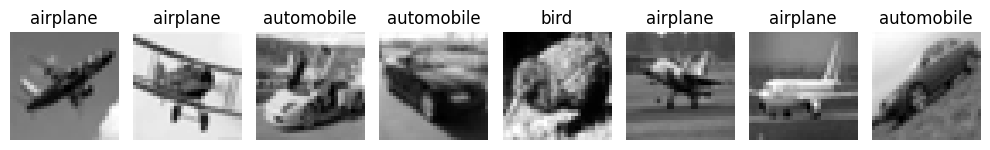

In [ ]:
# Display 8 random grayscale images in a row with class names
np.random.seed(42)
random_idx = np.random.choice(len(x_train_gray), 8, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_idx):
    plt.subplot(1, 8, i+1)
    plt.imshow(x_train_gray[idx], cmap='gray')
    plt.title(classes_all[y_train_sel[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

**Q10.3 ENDS**